## Market Basket Analysis


## Importing Library

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
os.chdir('D:\\Data_Science\\projects')
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from statsmodels.tsa.seasonal import seasonal_decompose


 # Problem

## A Grocery Store shared the transactional data with you. Your job is to identify the most popular combos that can be suggested to the Grocery Store chain after a thorough analysis of the most commonly occurring sets of menu items in the customer orders. The Store doesn’t have any combo meals. Can you suggest the best combo meals? -->

## Exploratory Analysis 

## Dataset

In [4]:
df=pd.read_csv('dataset_group.csv')
df.head()

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose


## Data Dictionary

In [ ]:
mea=['Date of order','Transaction Number','Name of the item']
inde=list(df.columns)
df_dict=pd.DataFrame({'Column_name':inde,"Meaning":mea})
df_dict

,Column_name,Meaning
0,Date,Date of order
1,Order_id,Transaction Number
2,Product,Name of the item


In [ ]:
df.columns

Index(['Date', 'Order_id', 'Product'], dtype='object')

## Shape

In [ ]:
df.shape

(20641, 3)

In [ ]:
print('No. of rows:',df.shape[0])
print('No. of columnss:',df.shape[1])

No. of rows: 20641
No. of columnss: 3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


## Data description

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,20641,603,08-02-2019,183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order_id,20641,NaN,NaN,NaN,575.986,328.557,1,292,581,862,1139
Product,20641,37,poultry,640,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order_id,20641.0,575.986289,328.557078,1.0,292.0,581.0,862.0,1139.0


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Date,20641,603,08-02-2019,183
Product,20641,37,poultry,640


### We have poultry as the most bought item
### and 08-02-2019 being the most frequently bought day with 183 items bought

### Absence of bad values

## Null values:


In [ ]:
df.isnull().sum()

Date        0
Order_id    0
Product     0
dtype: int64

### Absence of null values 

## Duplicates

In [ ]:
df = df.drop(df[df.Product == 'none'].index)
df['Product'] = df['Product'].str.lower()

In [ ]:
print('Number of duplicates :',df.duplicated().sum())

Number of duplicates : 4730


In [ ]:
df[df.duplicated()==True]

,Date,Order_id,Product
10,01-01-2018,1,all- purpose
13,01-01-2018,1,all- purpose
18,01-01-2018,1,dinner rolls
29,01-01-2018,2,waffles
31,01-01-2018,2,hand soap
...,...,...,...
20616,24-02-2020,1137,paper towels
20632,25-02-2020,1138,sandwich bags
20633,25-02-2020,1138,toilet paper
20635,25-02-2020,1138,soda


In [ ]:
df.columns

Index(['Date', 'Order_id', 'Product'], dtype='object')

### Duplicates are to be removed later part of model

## Unique products

In [ ]:
print('Number of unique products :',df.Product.nunique())

Number of unique products : 37


In [ ]:
df.Product.unique()

array(['yogurt', 'pork', 'sandwich bags', 'lunch meat', 'all- purpose',
       'flour', 'soda', 'butter', 'beef', 'aluminum foil', 'dinner rolls',
       'shampoo', 'mixes', 'soap', 'laundry detergent', 'ice cream',
       'toilet paper', 'hand soap', 'waffles', 'cheeses', 'milk',
       'dishwashing liquid/detergent', 'individual meals', 'cereals',
       'tortillas', 'spaghetti sauce', 'ketchup', 'sandwich loaves',
       'poultry', 'bagels', 'eggs', 'juice', 'pasta', 'paper towels',
       'coffee/tea', 'fruits', 'sugar'], dtype=object)

In [ ]:
df.Product.value_counts()

poultry                         640
soda                            597
cereals                         591
ice cream                       579
cheeses                         578
waffles                         575
soap                            574
lunch meat                      573
bagels                          573
juice                           570
eggs                            570
toilet paper                    569
dinner rolls                    567
aluminum foil                   566
coffee/tea                      565
shampoo                         562
beef                            561
paper towels                    556
flour                           555
butter                          555
milk                            555
mixes                           554
all- purpose                    551
dishwashing liquid/detergent    551
ketchup                         548
yogurt                          545
individual meals                544
tortillas                   

## Maximum count is Poultry with 640
## Minimum count is handsoap with 502

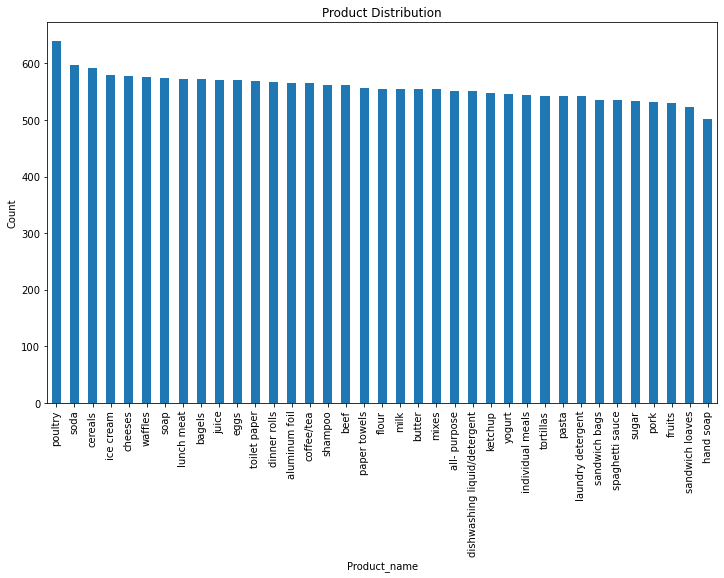

In [ ]:
df['Product'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(12,7));
plt.title('Product Distribution');
plt.ylabel('Count');
plt.xlabel('Product_name');

# Groupby

## Date

In [ ]:
cc=df.groupby(by=['Date']).agg({'Order_id': lambda x:x.count()})
cc.columns=['count']
cc

,count
Date,
2018-01-01,39
2018-01-02,15
2018-01-03,127
2018-01-04,28
2018-01-05,37
...,...
2020-10-02,22
2020-11-01,87
2020-11-02,19


### By Month

Text(0.5, 1.0, 'Trend across time')

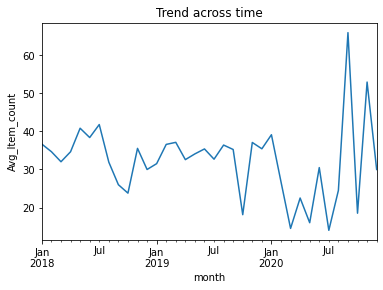

In [126]:
dfc=cc.copy()
dfc['Date']=dfc.index
dfc.index=list(range(len(cc)))
dfc['month'] = pd.to_datetime(dfc['Date']).dt.to_period('M')
dfc.groupby('month')['count'].mean().plot();
plt.ylabel('Avg_Item_count');
plt.title('Trend across time')


### No particular trend

### By Day

Text(0.5, 1.0, 'Trend across time')

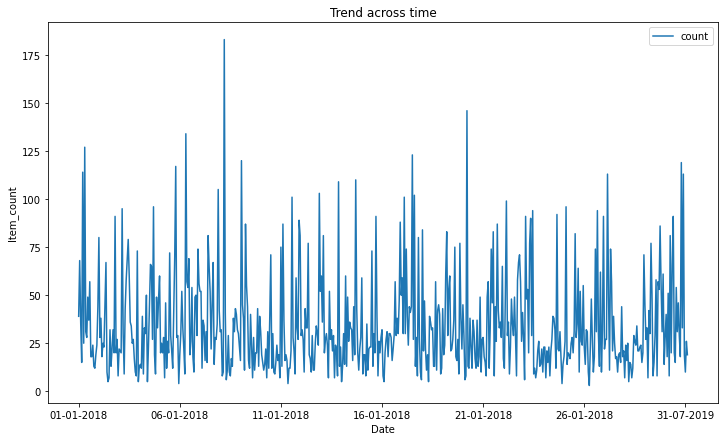

In [158]:
cc=df.groupby(by=['Date']).agg({'Order_id': lambda x:x.count()})
cc.columns=['count']
cc.plot(kind='line',figsize=(12,7));
plt.ylabel('Item_count');
plt.title('Trend across time')
# plt.xticks(rotation='90');

In [107]:
dfc.describe().T

,count,mean,std,min,25%,50%,75%,max
count,603.0,34.230514,25.843991,3.0,16.5,27.0,44.0,183.0


### Maximum No. of items bought for a day =183
### Minimum No. of items bought for a day =3
### Average No. of items bought for a day =27
### 50th percentile and mean are almost same but distribution isn't normal
### No particular trend

## Order_id

In [74]:
df_ord=df.groupby(by=['Order_id']).agg({'Product': lambda x:x.count()})
df_ord

,Product
Order_id,
1,19
2,20
3,27
4,6
5,20
...,...
1135,30
1136,20
1137,23


          count       mean       std  min   25%   50%   75%   max
Product  1139.0  18.122037  7.883267  3.0  11.0  18.0  25.0  34.0


<AxesSubplot:xlabel='Order_id'>

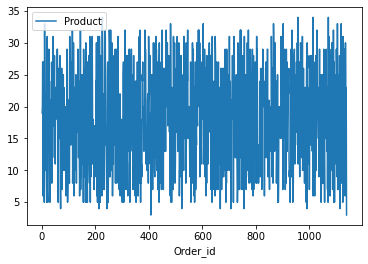

In [113]:
print(df_ord.describe().T)
df_ord.plot()

### Maximum No. of items bought for an order id =34
### Minimum No. of items bought for an order id =3
### Average No. of items bought for an order id =18
### 50th percentile and mean are almost same but distribution isn't normal
### No particular trend

## Date,Order_id ,Product

In [77]:
df0=df.groupby(by=list(df.columns)).agg({'Product': lambda x:x.count()})
df0.columns=['Count']
df0

Count
Date       Order_id Product               
2018-01-01 1        all- purpose         3
                    aluminum foil        1
                    beef                 1
                    butter               1
                    dinner rolls         2
...                                    ...
2020-12-02 1119     sandwich bags        1
                    sandwich loaves      1
                    soda                 1
                    toilet paper         1
                    yogurt               3

[15911 rows x 1 columns]

## Use of Market Basket Analysis 

##      Market Basket Analysis  works by looking for combinations of items that occur together frequently in transactions i.e, it allows retailers to identify relationships between the items that people buy so retailers can generate greater profit from it.
## ASSOSCIATION Rule:
## 	Market basket analysis mainly works with the ASSOCIATION Rule which has 2 parts namely
##  	Antecedent: An antecedent is an item found within the data
## Consequent: A consequent is an item found in combination with the antecedent. 
## i.e,associate buying of Product A(Antecedent) to that of buying Product B(Consequent)


In [57]:
basket=df.groupby(['Order_id', 'Product'])['Product'].count().unstack().reset_index().fillna(0).set_index('Order_id')
basket

Product,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,sandwich loaves,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,waffles,yogurt
Order_id,,,,,,,,,,,,,,,,,,,,,
1,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,2.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,1.0,0.0,0.0,4.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1136,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,4.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1137,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,3.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [79]:
def encode_zero_one(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

### to remove redundancy we map items with value greater than or equal to 1 with 1
### This also removes duplicates(Here we consider them as same product bought more than once at a time )

In [162]:
df=pd.read_csv('dataset_group.csv')
basket0=df.groupby(['Order_id', 'Product'])['Product'].count().unstack().reset_index().fillna(0).set_index('Order_id')
basket0=basket0.applymap(encode_zero_one)
basket0

Product,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,sandwich loaves,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,waffles,yogurt
Order_id,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,1,1,0,0,0,1,0,...,0,1,1,1,0,0,0,0,0,1
2,0,1,0,0,0,1,1,0,0,1,...,0,1,0,0,0,0,1,1,1,1
3,0,0,1,0,0,1,1,0,1,0,...,1,1,1,1,1,0,1,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
5,1,0,0,0,0,0,0,0,1,0,...,1,0,0,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,1,0,0,1,0,1,1,1,1,1,...,0,1,1,0,0,1,0,0,0,0
1136,0,0,0,0,0,1,1,1,1,1,...,0,0,1,0,1,0,0,0,0,0
1137,0,0,1,1,0,0,0,0,1,1,...,0,1,1,0,0,1,0,1,0,1


In [152]:
itemsets = apriori(basket0, min_support = 0.03, use_colnames = True, low_memory=True)
itemsets.sort_values(by='support')

,support,itemsets
36986,0.030729,"(toilet paper, laundry detergent, poultry, han..."
37291,0.030729,"(individual meals, spaghetti sauce, paper towe..."
10541,0.030729,"(all- purpose, juice, hand soap, spaghetti sauce)"
16270,0.030729,"(bagels, mixes, cheeses, flour)"
16274,0.030729,"(bagels, poultry, cheeses, flour)"
...,...,...
35,0.394205,(waffles)
19,0.395083,(lunch meat)
5,0.395961,(cereals)
14,0.398595,(ice cream)


In [163]:
### Using Apriori we restrict number of results by setting the minimum threshold of support to 0.03
### Unable to adjust minimum threshold for confidence

# Associations Identified 

# Lift without any threshold

In [153]:
basket=basket0.copy()
basket = association_rules(itemsets, metric ="lift") 
basket = basket.sort_values(['lift','confidence'], ascending =[False, False]) 
basket.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
517843,"(dishwashing liquid/detergent, cheeses, soda)","(flour, waffles)",0.077261,0.144864,0.030729,0.397727,2.745523,0.019536,1.419849
517858,"(flour, waffles)","(dishwashing liquid/detergent, cheeses, soda)",0.144864,0.077261,0.030729,0.212121,2.745523,0.019536,1.171169
517992,"(eggs, lunch meat, pasta)","(paper towels, ice cream)",0.065847,0.170325,0.030729,0.466667,2.739863,0.019513,1.555641
518009,"(paper towels, ice cream)","(eggs, lunch meat, pasta)",0.170325,0.065847,0.030729,0.180412,2.739863,0.019513,1.139784
518004,"(eggs, ice cream)","(lunch meat, paper towels, pasta)",0.166813,0.068481,0.030729,0.184211,2.689946,0.019305,1.141862
517997,"(lunch meat, paper towels, pasta)","(eggs, ice cream)",0.068481,0.166813,0.030729,0.448718,2.689946,0.019305,1.511362
518030,"(ice cream, poultry, pasta)","(eggs, paper towels)",0.071993,0.165935,0.031607,0.439024,2.645761,0.019661,1.486811
518031,"(eggs, paper towels)","(ice cream, poultry, pasta)",0.165935,0.071993,0.031607,0.190476,2.645761,0.019661,1.146362
517999,"(ice cream, lunch meat, pasta)","(eggs, paper towels)",0.070237,0.165935,0.030729,0.437500,2.636574,0.019074,1.482782
518002,"(eggs, paper towels)","(ice cream, lunch meat, pasta)",0.165935,0.070237,0.030729,0.185185,2.636574,0.019074,1.141073


## (dishwashing liquid/detergent, cheeses, soda) and (flour, waffles) have both have  high lift of 2.745523 
## and both can be sold as combo for offers

# Lift  With Threshold 2

In [164]:
basket=basket0.copy()
basket = association_rules(itemsets, metric ="lift",min_threshold=2) 
basket = basket.sort_values(['lift','confidence'], ascending =[False, False]) 
basket.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,"(dishwashing liquid/detergent, cheeses, soda)","(flour, waffles)",0.077261,0.144864,0.030729,0.397727,2.745523,0.019536,1.419849
44,"(flour, waffles)","(dishwashing liquid/detergent, cheeses, soda)",0.144864,0.077261,0.030729,0.212121,2.745523,0.019536,1.171169
126,"(eggs, lunch meat, pasta)","(paper towels, ice cream)",0.065847,0.170325,0.030729,0.466667,2.739863,0.019513,1.555641
141,"(paper towels, ice cream)","(eggs, lunch meat, pasta)",0.170325,0.065847,0.030729,0.180412,2.739863,0.019513,1.139784
137,"(eggs, ice cream)","(lunch meat, paper towels, pasta)",0.166813,0.068481,0.030729,0.184211,2.689946,0.019305,1.141862
130,"(lunch meat, paper towels, pasta)","(eggs, ice cream)",0.068481,0.166813,0.030729,0.448718,2.689946,0.019305,1.511362
152,"(ice cream, poultry, pasta)","(eggs, paper towels)",0.071993,0.165935,0.031607,0.439024,2.645761,0.019661,1.486811
153,"(eggs, paper towels)","(ice cream, poultry, pasta)",0.165935,0.071993,0.031607,0.190476,2.645761,0.019661,1.146362
132,"(ice cream, lunch meat, pasta)","(eggs, paper towels)",0.070237,0.165935,0.030729,0.437500,2.636574,0.019074,1.482782
135,"(eggs, paper towels)","(ice cream, lunch meat, pasta)",0.165935,0.070237,0.030729,0.185185,2.636574,0.019074,1.141073


## (dishwashing liquid/detergent, cheeses, soda) and (flour, waffles) have both have  high lift of 2.745523 
## and both can be sold as combo for offers

# Confidence  With Threshold 0.30

In [156]:
basket=basket0.copy()
basket = association_rules(itemsets, metric ="confidence",min_threshold=0.30) 
basket = basket.sort_values(['confidence','lift'], ascending =[False,False]) 
basket.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
159173,"(eggs, ice cream, lunch meat, pasta)",(paper towels),0.038630,0.362599,0.030729,0.795455,2.193760,0.016721,3.116184
159084,"(eggs, ice cream, cereals, pasta)",(paper towels),0.040386,0.362599,0.031607,0.782609,2.158332,0.016963,2.932046
159171,"(eggs, lunch meat, paper towels, pasta)",(ice cream),0.039508,0.398595,0.030729,0.777778,1.951297,0.014981,2.706321
159100,"(cheeses, dishwashing liquid/detergent, flour,...",(soda),0.040386,0.390694,0.030729,0.760870,1.947484,0.014950,2.548009
159145,"(ice cream, dishwashing liquid/detergent, pape...",(eggs),0.044776,0.389816,0.033363,0.745098,1.911411,0.015908,2.393800
159114,"(eggs, dinner rolls, ice cream, pasta)",(paper towels),0.043898,0.362599,0.032485,0.740000,2.040823,0.016567,2.451543
159097,"(dishwashing liquid/detergent, cheeses, soda, ...",(flour),0.042142,0.352941,0.030729,0.729167,2.065972,0.015855,2.389140
159189,"(eggs, ice cream, poultry, pasta)",(paper towels),0.043898,0.362599,0.031607,0.720000,1.985666,0.015689,2.276433
159190,"(ice cream, poultry, paper towels, pasta)",(eggs),0.043898,0.389816,0.031607,0.720000,1.847027,0.014494,2.179230
159142,"(eggs, dishwashing liquid/detergent, paper tow...",(pasta),0.046532,0.371378,0.033363,0.716981,1.930595,0.016082,2.221130


In [167]:
## (eggs, ice cream, lunch meat, pasta)	and (paper towels) have both have  high lift of 2.193760 
## and both can be sold as combo for offers

# A suggestion of Possible Combos with Lucrative Offers

#   (dishwashing liquid/detergent, cheeses, soda)  can be combined with  and (flour, waffles) have both have  high lift of 2.745523  and both can be sold for discount 
#  (eggs, ice cream, lunch meat, pasta)	and (paper towels) have both have  high lift of 2.193760 and both can be sold as combo for offers
#  (eggs, lunch meat, pasta) and (paper towels, ice cream) have both have  high lift of 2.739863
# and both can be sold as combo for offers


# Discount

## dishwashing liquid/detergent, cheeses, soda  and flour, waffles can be sold for  a discount of 10%off
##  (eggs, ice cream, lunch meat, pasta) can be sold with free paper towels
